In [117]:
%matplotlib inline
import numpy as np 
import pandas as pd

In [118]:
import os

In [119]:
import pandas as pd 

df = pd.read_csv('HAM10000_metadata.csv')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [120]:
df['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

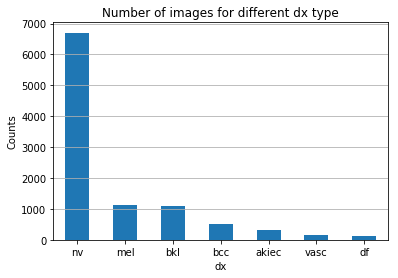

In [121]:
import matplotlib.pyplot as plt
df['dx'].value_counts().plot.bar(rot=0)
plt.title('Number of images for different dx type')
plt.xlabel('dx')
plt.ylabel('Counts')
plt.grid(axis='y')


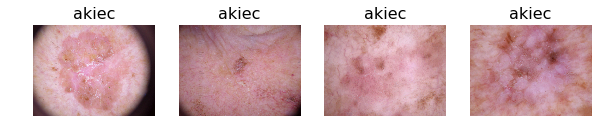

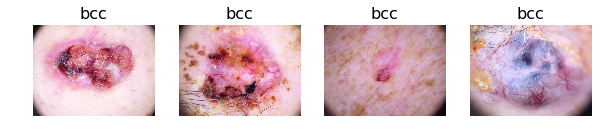

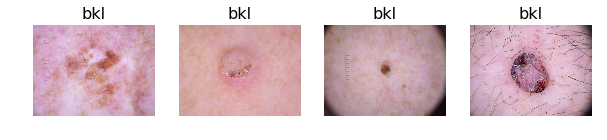

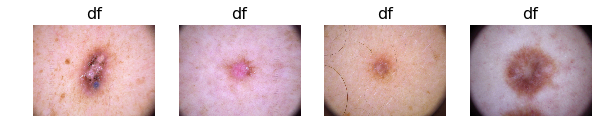

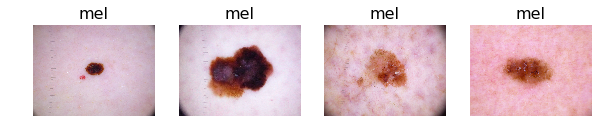

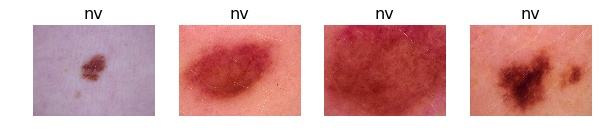

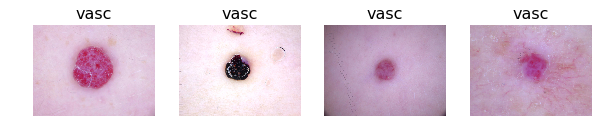

In [122]:
imgdict = {'akiec':list(df[df['dx']=='akiec']['image_id'])[0:24:6],'bcc':list(df[df['dx']=='bcc']['image_id'])[0:24:6],\
        'bkl':list(df[df['dx']=='bkl']['image_id'])[0:24:6],'df':list(df[df['dx']=='df']['image_id'])[0:24:6],\
        'mel':list(df[df['dx']=='mel']['image_id'])[0:24:6],'nv':list(df[df['dx']=='nv']['image_id'])[0:24:6],\
        'vasc':list(df[df['dx']=='vasc']['image_id'])[0:24:6]}
#print(imgdict,'\n',list(imgdict.values()),list(imgdict.keys()))
for i in np.arange(7):
    cancertype = list(imgdict.keys())[i]
    cancertypetolist = [cancertype,cancertype,cancertype,cancertype]
    plot_images(list(imgdict.values())[i],cancertypetolist)

In [123]:
df['age'].fillna((df['age'].mean()), inplace=True)

In [124]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [125]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

df['cell_type'] = df['dx'].map(lesion_type_dict.get) 
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes

In [126]:
import seaborn as sns


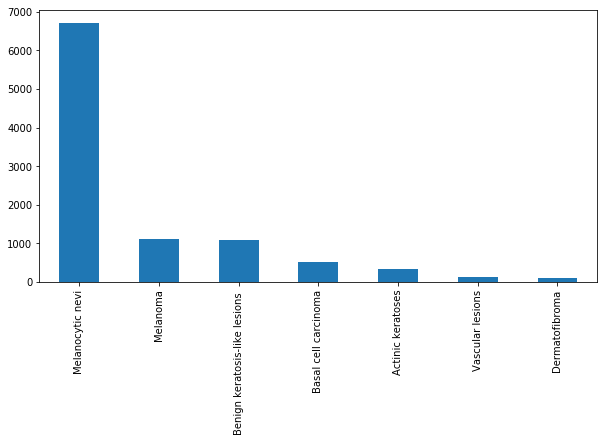

In [127]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

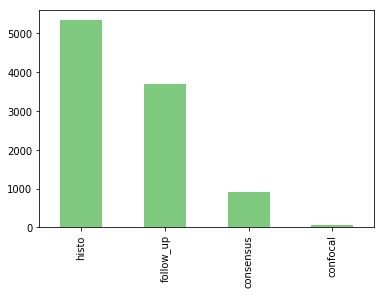

In [128]:
df['dx_type'].value_counts().plot(kind='bar', colormap='Accent')

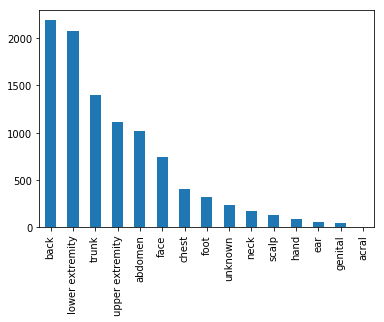

In [129]:
df['localization'].value_counts().plot(kind='bar')

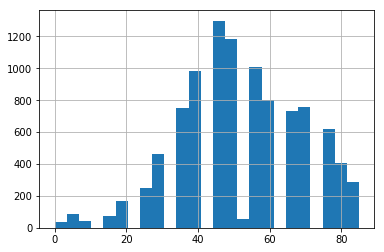

In [130]:
df['age'].hist(bins=25)

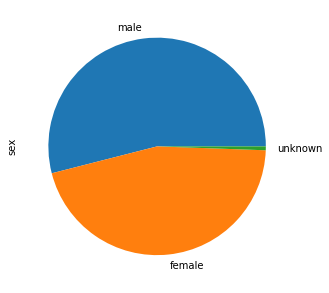

In [131]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
df['sex'].value_counts().plot(kind='pie')


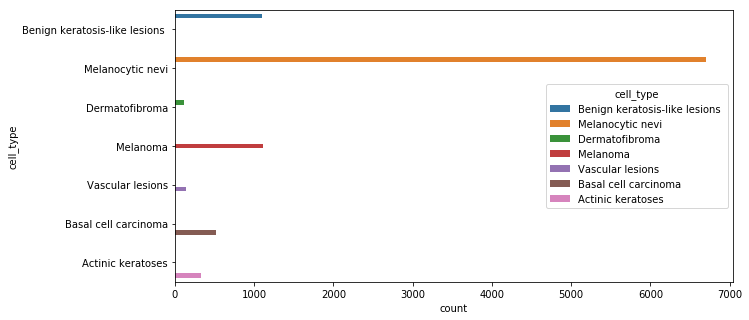

In [132]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
sns.countplot(y='cell_type',data=df, hue="cell_type",ax=ax1)

                 Age Distribution


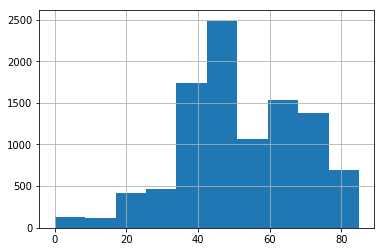

In [133]:
plot = df['age'].hist()
print ('                 Age Distribution')